In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from cadet import Cadet

In [4]:
# macOS installation path
# Cadet.cadet_path = '/Users/hoangnguyen/cadet-core/cadet/bin/cadet-cli'

In [6]:
# Windows installation path
# Cadet.cadet_path = 'C:/Users/hoang/miniconda3/envs/cadet-env/bin/cadet-cli.exe'

In [7]:
# Setting up the model
model = Cadet()
model.root.input.model.nunits = 1

# Forward reaction

In [8]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0]
V = 1e-6

kfwd = [0.1]
kbwd = [0.0]

stoich = [-1, 
           1]

n_comp = len(init_c)

In [9]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [10]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [11]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

In [12]:
# Running simulation
model.filename = 'reaction-cstr-1.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


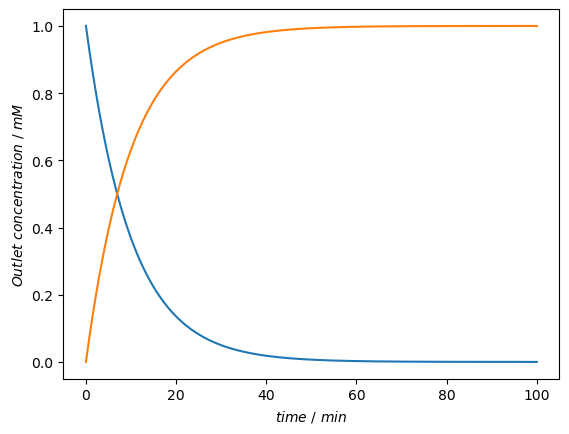

In [13]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

# Equilibrium reaction

In [14]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0]
V = 1e-6

kfwd = [0.1]
kbwd = [0.01]

stoich = [-2, 
           1]

In [15]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [16]:
# Running simulation
model.filename = 'reaction-cstr-2.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


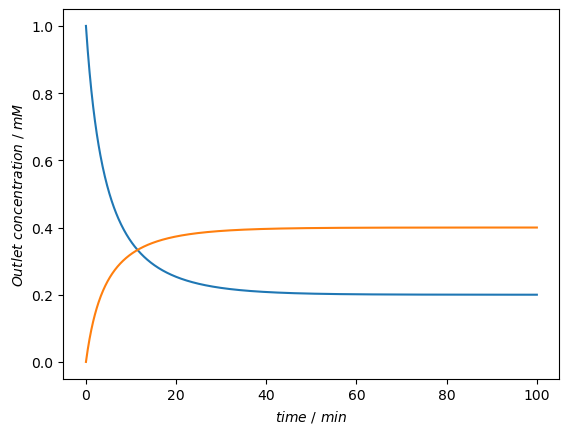

In [17]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

In [18]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0, 0.0]
V = 1e-6

kfwd = [0.1, 0.25]
kbwd = [0.0, 0.0]

stoich = [-1, -1, 
           1, 0,
           0, 1]

n_comp = len(init_c)

In [19]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [20]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

In [21]:
# Running simulation
model.filename = 'reaction-cstr-3.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


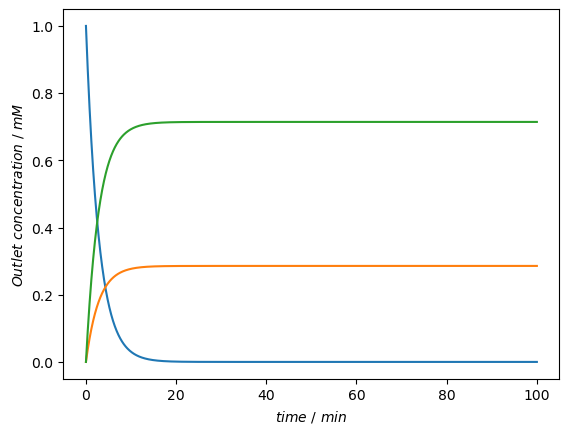

In [48]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()